> Should Olist remove underperforming sellers from its marketplace?

In [3]:
# import data, and sort from worst to best seller according to profits

sellers = seller.get_training_data()

sellers.sort_values(by='profits', ascending = True, inplace = True)

sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
769,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,0.0,9.539486,2017-02-17 07:45:11,2018-08-29 09:25:12,18.0,0.127957,0.510215,3.922043,36270,1854,2039,1.099784,123304.83,13770.483,-22499.517
2360,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.0,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,20.0,0.147640,0.476948,3.804610,40890,1806,2009,1.112403,200472.92,21647.292,-19242.708
1358,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,0.0,11.539753,2017-02-02 17:10:21,2018-08-28 03:45:15,19.0,0.117277,0.581808,4.069222,30000,1706,1819,1.066237,104288.42,11948.842,-18051.158
946,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,0.0,13.315562,2017-08-16 15:15:26,2018-08-25 02:45:21,12.0,0.116827,0.524847,3.984307,20710,1146,1204,1.050611,37177.52,4677.752,-16032.248
315,8b321bb669392f5163d04c59e235e066,sao paulo,SP,0.0,12.616899,2017-10-27 16:31:30,2018-08-21 17:08:38,10.0,0.118770,0.567338,4.069989,15620,943,1018,1.079533,17535.69,2553.569,-13066.431


In [4]:
# Calculate IT COSTS
# IT costs =  A * (n_orders)**0.5

# First, compute A
#A = olist_it_costs_all_orders / (sellers['n_orders'].sum()**0.5)

A = 500000 / (sellers['n_orders'].sum()**0.5)
A

1582.3735631973473

IT costs are 1582.3735631973473

In [5]:
# Calculating benefits as it stands
# Profits - IT Costs

benef = sellers.profits.sum() - ( A * (sellers['n_orders'].sum()**0.5)  )

benef

616965.223999999

If we subtract the IT costs from the profits we have the benefits: 1582.3735631973473

In [6]:
# Iteratively removing sellers by slicing dataframe
sellers_removed = []
total_profits = []

for i in range(len(sellers)):
    
    # Recalculate profits
    profits = sellers[i:].profits.sum() - A * (sellers[i:]['n_orders'].sum()**0.5)
    
    # Append recalculated profits and # of sellers removed to respective lists
    total_profits.append(profits)
    sellers_removed.append(i)

Here we can see the plot and where more or less is the turning point

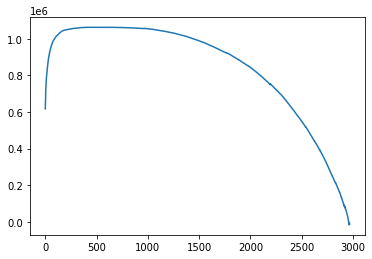

In [7]:
# Plot the bad boy
plt.plot(sellers_removed,total_profits)

A more accurate represantation of the turning point

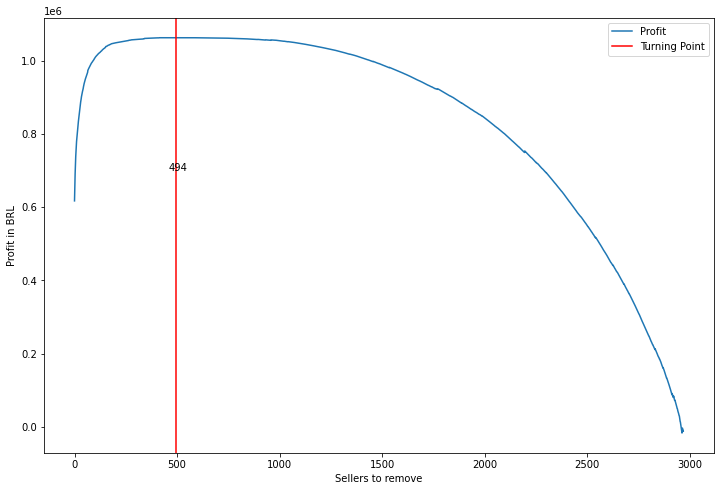

In [23]:
removed_sellers_df = pd.DataFrame(total_profits, sellers_removed)
turning_point = removed_sellers_df.idxmax(axis = 0)[0]
plt.figure(figsize=(12,8));
plt.plot(removed_sellers_df, label='Profit');
plt.axvline(turning_point, color='red', label = 'Turning Point');
plt.annotate(turning_point,(461,700000));
plt.xlabel('Sellers to remove');
plt.ylabel('Profit in BRL');
plt.legend();

It turns out that we can maximize the profit if we remove the first 494 underperforming sellers